# Importing the required libraries

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import warnings
warnings.filterwarnings("ignore")


In [139]:
#loading the csv file into a data frame using pandas
house_data = pd.read_csv("Bengaluru_House_Data.csv")
house_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [43]:
#checking the shape of dataset
house_data.shape

(13320, 9)

In [44]:
house_data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [45]:
house_data.groupby('area_type')['area_type'].value_counts()

area_type             area_type           
Built-up  Area        Built-up  Area          2418
Carpet  Area          Carpet  Area              87
Plot  Area            Plot  Area              2025
Super built-up  Area  Super built-up  Area    8790
Name: area_type, dtype: int64

In [46]:
#droping unnecessary columns

In [47]:
house_data1 = house_data.drop(['area_type','society','balcony','availability'],axis='columns')
house_data1.shape

(13320, 5)

# Data Cleaning

In [48]:
#Checking the null values
house_data1 .isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

data cleaning

In [49]:
#Dropping null values as they are very few
house_data2 = house_data1.dropna()
house_data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [50]:
house_data2.shape

(13246, 5)

# Feature Engineering

In [140]:
#Adding new feature for BHK
house_data2['bhk'] = house_data2['size'].apply(lambda x: int(x.split(' ')[0]))
house_data2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [52]:
#defining a function to check whether the value is float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [53]:
house_data2[~house_data2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Here total_sqft is given in a range (e.g. 2100-2850),for simplifying it we need to take average of min and max value in the range.Also droping some cases where total_sqft column is carring alphanumeric data.

# defining a function to convert the range of column values to a single value

In [54]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [55]:
house_data3 = house_data2.copy()
house_data3.total_sqft = house_data3.total_sqft.apply(convert_sqft_to_num)
house_data3 = house_data3[house_data3.total_sqft.notnull()]
house_data3[648:672]

,location,size,total_sqft,bath,price,bhk
656,Haralur Road,4 BHK,3385.0,5.0,260.00,4
657,Nagondanahalli,3 BHK,1641.0,3.0,66.00,3
658,Horamavu Agara,2 BHK,1200.0,2.0,45.00,2
659,Raja Rajeshwari Nagar,2 BHK,1260.0,2.0,67.39,2
660,Mahadevpura,3 BHK,1720.0,3.0,78.00,3
661,Yelahanka,2 BHK,1132.5,2.0,48.13,2
662,Yelahanka,2 BHK,1210.0,2.0,45.98,2
663,Indira Nagar,4 Bedroom,2200.0,4.0,200.00,4
664,Bisuvanahalli,3 BHK,1075.0,2.0,45.00,3
665,Thanisandra,3 BHK,1702.0,3.0,130.00,3


# Feature Engineering

In [56]:
#creating a new colomn named  price_per_sqft 
house_data4 = house_data3.copy()
house_data4['price_per_sqft'] = house_data4['price']*100000/house_data4['total_sqft']
house_data4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [57]:
house_data4['price_per_sqft'].describe()


count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [58]:
#exploring the location column 
len(house_data4.location.unique())

1298

In [59]:
house_data4['location'] = house_data4['location'].apply(lambda x: x.strip())
location_stats = house_data4['location'].value_counts(ascending=False)
location_stats[:10]

Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [60]:
location_stats.values.sum()

13200

In [61]:
len(location_stats[location_stats>10])

240

In [62]:
len(location_stats)

1287

In [63]:
len(location_stats[location_stats<=10])

1047

In [64]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [65]:
len(house_data4.location.unique())


1287

In [66]:
#redefining the 'location' column as 'other' value where location count is <= 10
house_data4.location = house_data4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [67]:
len(house_data4.location.unique())

241

In [68]:
house_data4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Detection and Removal

In [69]:
house_data4[house_data4.total_sqft/house_data4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [70]:
house_data4.shape

(13200, 7)

In [71]:
# Dropping rooms which have less than 300 sqft area
house_data5 = house_data4[~(house_data4.total_sqft/house_data4.bhk<300)]
house_data5.shape

(12456, 7)

In [72]:
house_data5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [73]:
# Removing data points further than 1 std deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
house_data6 = remove_pps_outliers(house_data5)
house_data6.shape

(10242, 7)

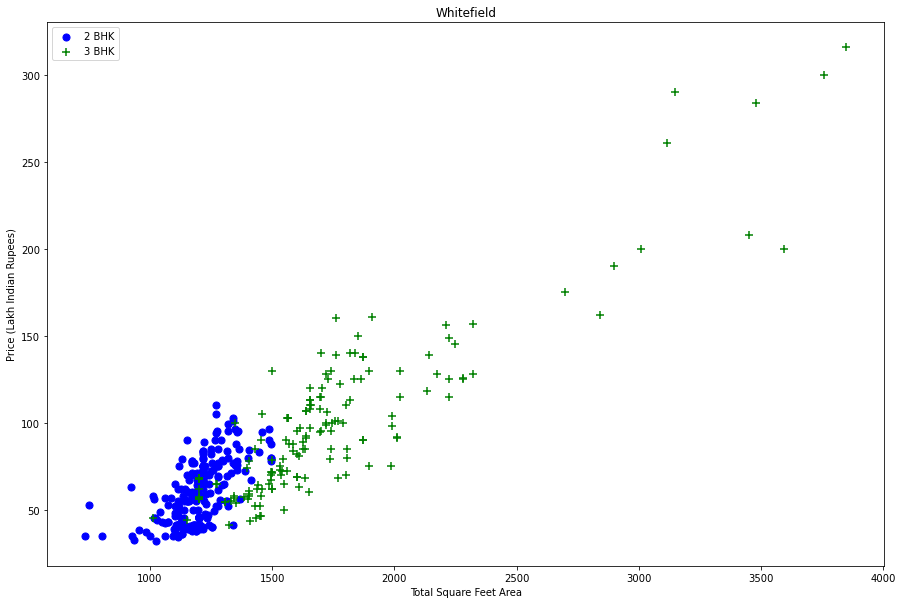

In [74]:
# Visualising unusual prices per sqft
def plot_scatter_chart(house_data,location):
    bhk2 = house_data[(house_data.location==location) & (house_data.bhk==2)]
    bhk3 = house_data[(house_data.location==location) & (house_data.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(house_data6,"Whitefield")

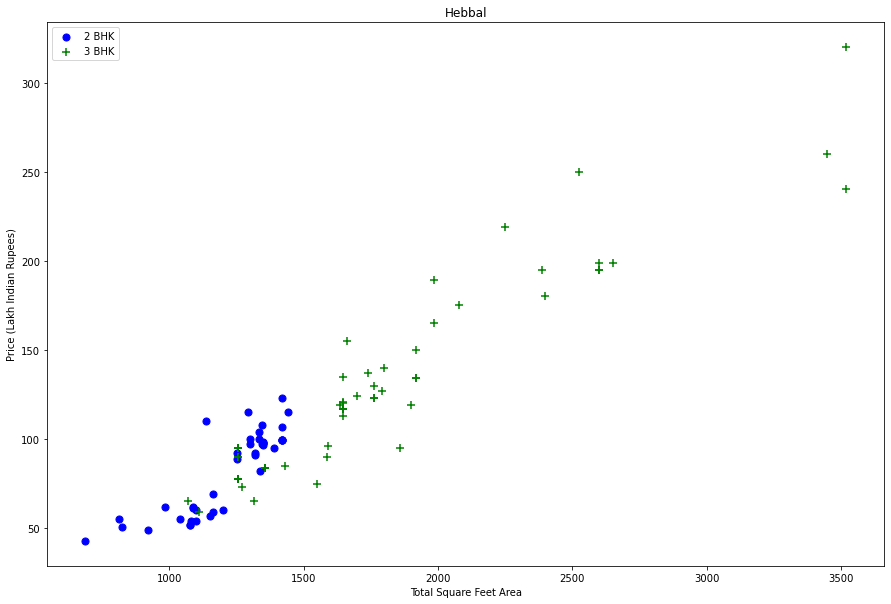

In [75]:
plot_scatter_chart(house_data6,"Hebbal")

In [76]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
house_data7 = remove_bhk_outliers(house_data6)
house_data7.shape

(7317, 7)

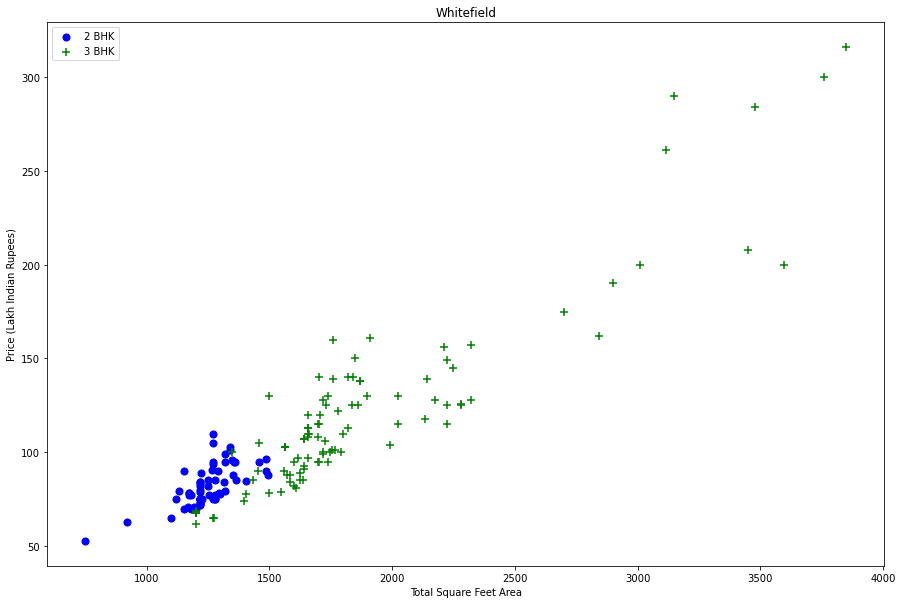

In [77]:
plot_scatter_chart(house_data7,"Whitefield")

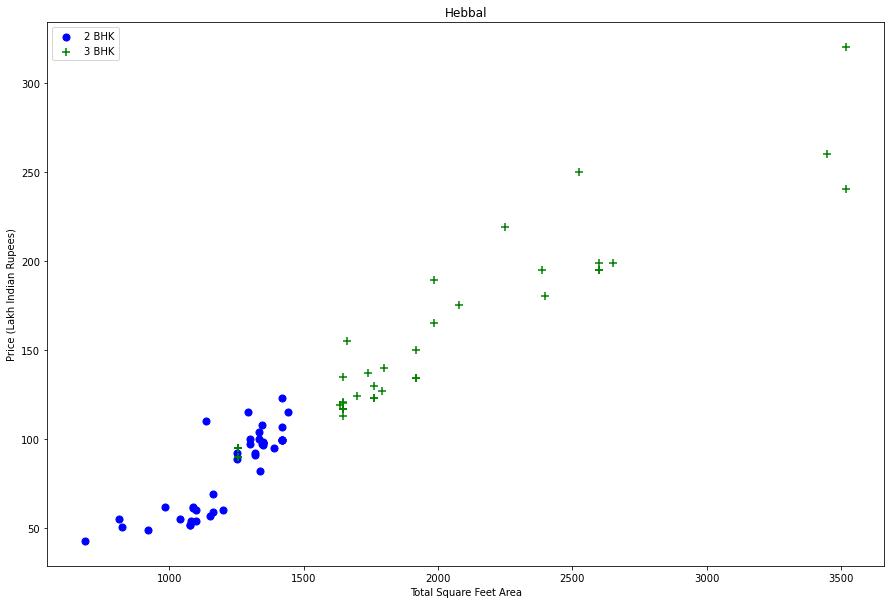

In [78]:
plot_scatter_chart(house_data7,"Hebbal")

Text(0, 0.5, 'Count')

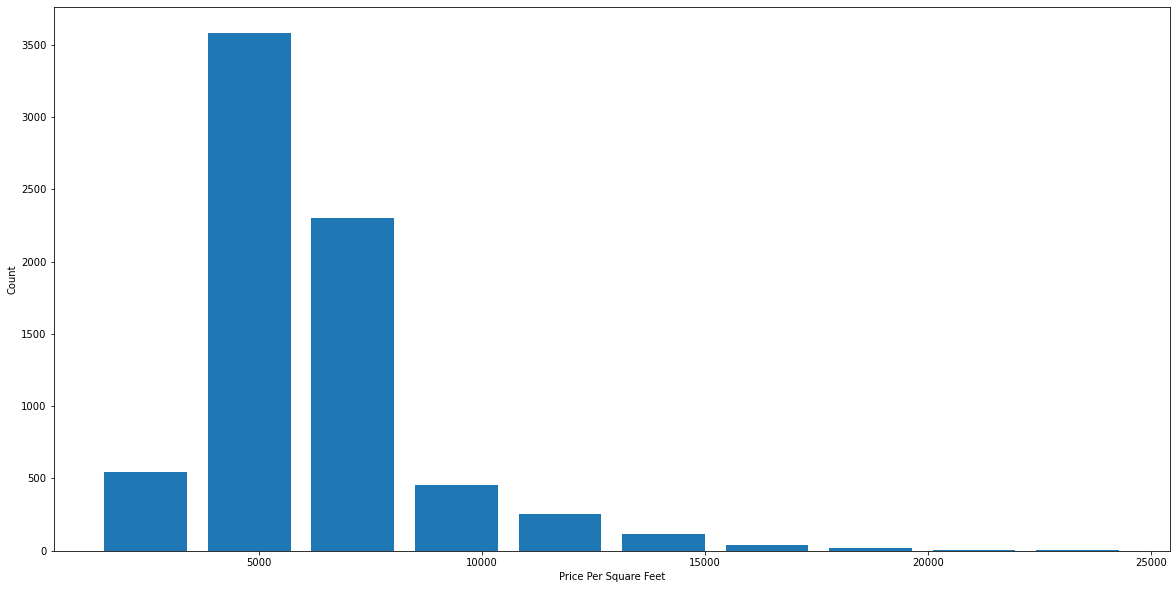

In [79]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(house_data7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature

In [80]:
house_data7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

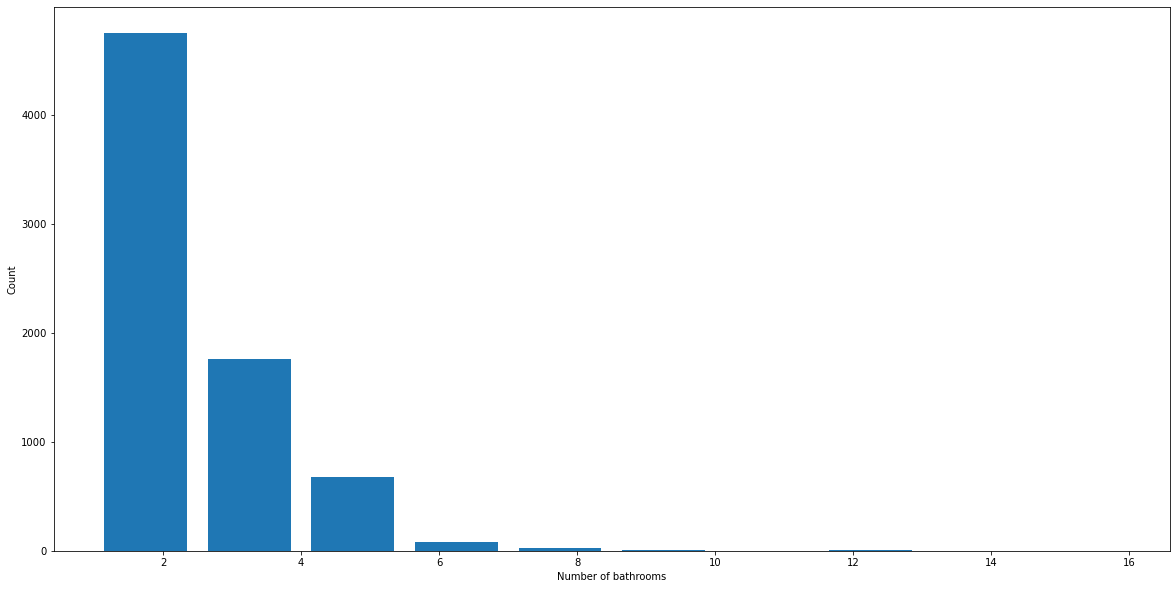

In [81]:
plt.hist(house_data7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [82]:
house_data7[house_data7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [83]:
house_data7[house_data7.bath>house_data7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [84]:
# Removing point which have no. of bathrooms > bhk + 2
house_data8 = house_data7[house_data7.bath<house_data7.bhk+2]
house_data8.shape

(7239, 7)

In [85]:
house_data8.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [86]:
house_data9 = house_data8.drop(['size','price_per_sqft'],axis='columns')
house_data9.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [138]:
#one hot encoding the location column
dummies = pd.get_dummies(house_data9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
house_data10 = pd.concat([house_data9,dummies.drop('other',axis='columns')],axis='columns')
house_data10.head(5)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
house_data11 = house_data10.drop('location',axis='columns')
house_data11.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
house_data11.shape

(7239, 244)

In [93]:
X = house_data11.drop(['price'],axis='columns')
X.head(5)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
X.shape

(7239, 243)

In [135]:
column=X.columns
print(column[200:245])

Index(['Ramagondanahalli', 'Ramamurthy Nagar', 'Rayasandra', 'Sahakara Nagar',
       'Sanjay nagar', 'Sarakki Nagar', 'Sarjapur', 'Sarjapur  Road',
       'Sarjapura - Attibele Road', 'Sector 2 HSR Layout',
       'Sector 7 HSR Layout', 'Seegehalli', 'Shampura', 'Shivaji Nagar',
       'Singasandra', 'Somasundara Palya', 'Sompura', 'Sonnenahalli',
       'Subramanyapura', 'Sultan Palaya', 'TC Palaya', 'Talaghattapura',
       'Thanisandra', 'Thigalarapalya', 'Thubarahalli', 'Tindlu',
       'Tumkur Road', 'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road',
       'Vasanthapura', 'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield', 'Yelachenahalli',
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object')


In [98]:
y = house_data11.price
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [99]:
len(y)

7239

In [100]:
# splitting the data in training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8629132245229442

### Using K Fold cross validation to measure accuracy of our models

In [102]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.825026  , 0.81371831, 0.8556777 , 0.84763806, 0.85130085])

In [111]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [112]:
lasso_model.score(X_test,y_test)

0.7826393164767916

In [113]:
cross_val_score(lasso_model, X, y, cv=cv)

array([0.77240628, 0.78339168, 0.79911322, 0.81343647, 0.7982457 ])

In [114]:
from sklearn.ensemble import RandomForestRegressor
rfc_model=RandomForestRegressor()

In [115]:
cross_val_score(rfc_model, X, y, cv=cv)

array([0.82588007, 0.73376164, 0.79719482, 0.66710769, 0.82965205])

In [116]:
from sklearn.svm import SVR
svm_model=SVR()

In [117]:
cross_val_score(svm_model, X, y, cv=cv)

array([0.46333286, 0.49060985, 0.55576303, 0.40958641, 0.64332785])

After analysing the above scores we can say that LinearRegression performed the best . Hence we will use that for prediction.

In [118]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [119]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.86570258312318

In [120]:
#Exporting the model to a pickle file
import pickle
pickle.dump(model,open('model1.pkl','wb'))

In [137]:
#Exporting location and column information to a file which  will be helpful during the web app creation
import json
columns1 = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns1))

In [126]:
predict_price('Whitefield',1200,3,3)

71.96487297981275

In [127]:
predict_price('Indira Nagar',1000, 2, 2)

193.31197733179937

In [106]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.86570258312318

In [136]:
predict_price('1st Block Jayanagar',1000, 2, 2)

202.3838624792633